In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


<ipython-input-4-b8b4c014ef00>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)
<ipython-input-4-b8b4c014ef00>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [8]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
498/498 [==============================] - 3s 4ms/step - loss: 0.4649 - accuracy: 0.7780 - val_loss: 0.3957 - val_accuracy: 0.8116
Epoch 2/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3897 - accuracy: 0.8076 - val_loss: 0.4000 - val_accuracy: 0.7999
Epoch 3/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3805 - accuracy: 0.8093 - val_loss: 0.3799 - val_accuracy: 0.8108
Epoch 4/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3764 - accuracy: 0.8111 - val_loss: 0.3694 - val_accuracy: 0.8110
Epoch 5/100
498/498 [==============================] - 3s 6ms/step - loss: 0.3755 - accuracy: 0.8115 - val_loss: 0.3651 - val_accuracy: 0.8286
Epoch 6/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3689 - accuracy: 0.8191 - val_loss: 0.3659 - val_accuracy: 0.8188
Epoch 7/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3643 - accuracy: 0.8227 - val_loss: 0.4070 - val_accuracy: 0.8003

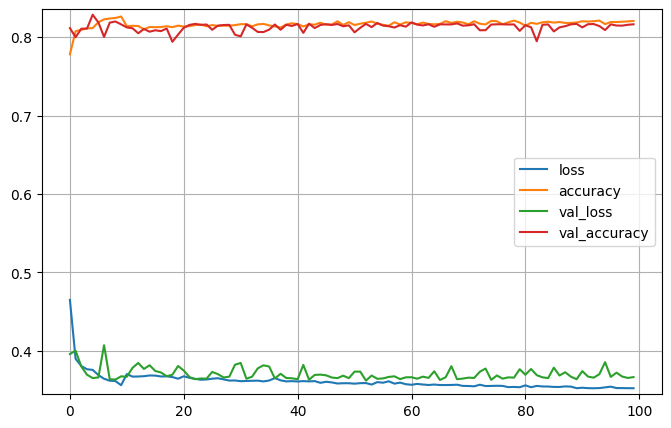

In [31]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.344444, 0.835555)
plt.show()

In [10]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3664 - accuracy: 0.8164


[0.36637961864471436, 0.8164010643959045]

In [17]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=-1) )

471/471 [==============================] - 1s 3ms/step


0.7543160690571049

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [18]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
history2 = model.fit(X_train_scaled , y_train, validation_data= (X_test_scaled , y_test), batch_size=32, epochs=100)

Epoch 1/100
498/498 [==============================] - 3s 4ms/step - loss: 0.3995 - accuracy: 0.8110 - val_loss: 0.3454 - val_accuracy: 0.8424
Epoch 2/100
498/498 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8419 - val_loss: 0.3368 - val_accuracy: 0.8444
Epoch 3/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3306 - accuracy: 0.8449 - val_loss: 0.3341 - val_accuracy: 0.8466
Epoch 4/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3269 - accuracy: 0.8467 - val_loss: 0.3335 - val_accuracy: 0.8458
Epoch 5/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3245 - accuracy: 0.8484 - val_loss: 0.3321 - val_accuracy: 0.8443
Epoch 6/100
498/498 [==============================] - 2s 5ms/step - loss: 0.3223 - accuracy: 0.8482 - val_loss: 0.3321 - val_accuracy: 0.8435
Epoch 7/100
498/498 [==============================] - 2s 3ms/step - loss: 0.3200 - accuracy: 0.8511 - val_loss: 0.3323 - val_accuracy: 0.8449

# Zad. 
Stwórz wykres porównujący metody. 

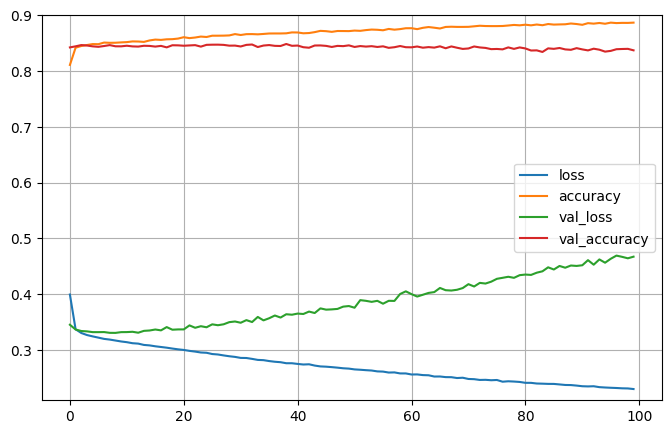

In [32]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.21, 0.9)
plt.show()

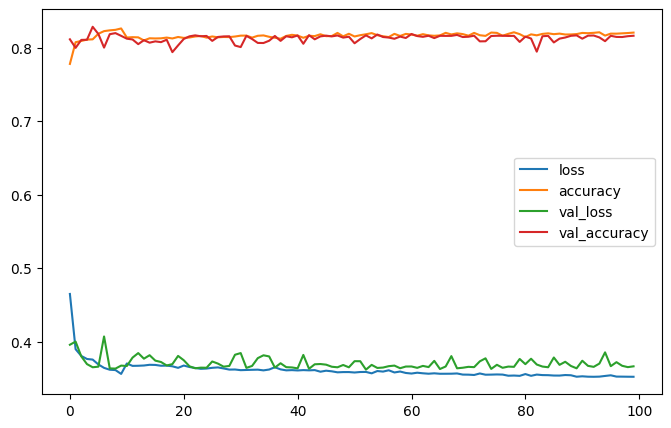

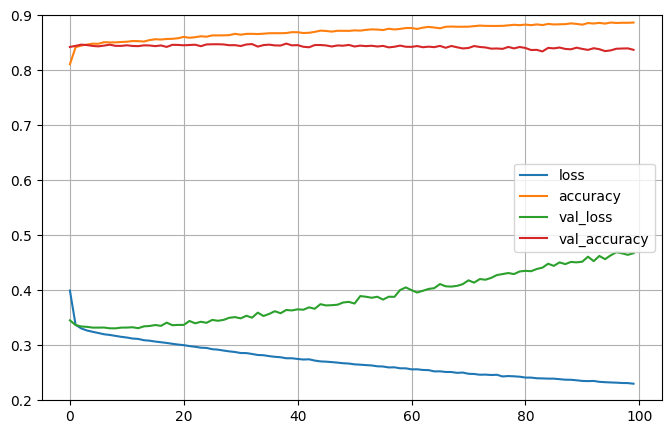

In [26]:
import pandas as pd

pd.DataFrame(history.history,).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.2, 0.9)
plt.show()